In [22]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df=pd.merge(clinical_trial_data,mouse_drug_data,how='outer',on='Mouse ID')

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [23]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
volume_mean=df[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
volume_mean=volume_mean.reset_index()

# Preview DataFrame
volume_mean.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error=df[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
standard_error=standard_error.reset_index()

# Preview DataFrame
standard_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [25]:
# Minor Data Munging to Re-Format the Data Frames
table1 = pd.pivot_table(volume_mean, values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')
# Preview that Reformatting worked
table1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


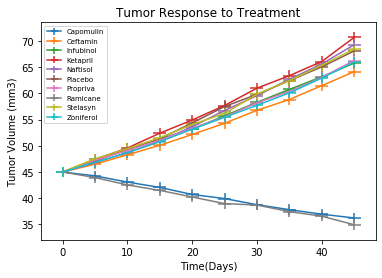

In [51]:
# Generate the Plot (with Error Bars)
x_values=table1.index.values
drugs=table1.columns.values

for drug in drugs:
    plt.errorbar(x_values,table1[drug],label=drug,xerr=1, yerr=1)
    
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best",prop={'size': 7})
# Save the Figure
plt.savefig('Images/treatment.png')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [27]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site=df[["Drug","Timepoint","Metastatic Sites"]].groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
mean_met_site=mean_met_site.reset_index()
# Preview DataFrame
mean_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [28]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_met_site=df[["Drug","Timepoint","Metastatic Sites"]].groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
mean_met_site=mean_met_site.reset_index()
# Preview DataFrame
mean_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [53]:
# Minor Data Munging to Re-Format the Data Frames
table2 = pd.pivot_table(mean_met_site, values='Metastatic Sites', index='Timepoint', columns='Drug')
# Preview that Reformatting worked
table2.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


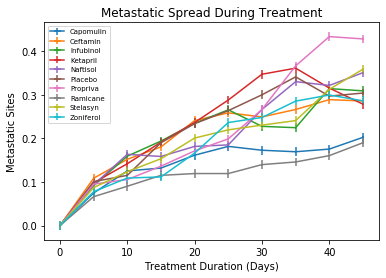

In [56]:
# Generate the Plot (with Error Bars)
x_values=table2.index.values
drugs=table2.columns.values

for drug in drugs:
    plt.errorbar(x_values,table2[drug],label=drug,xerr=.1, yerr=.01)
    
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best",prop={'size': 7})
# Save the Figure
plt.savefig('Images/spread.png')
# Show the Figure
plt.show()

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) 
count_mice=df[["Drug","Timepoint","Mouse ID"]].groupby(["Drug","Timepoint"]).count()
# Convert to DataFrame
count_mice=count_mice.reset_index()
# Preview DataFrame
count_mice.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [32]:
# Minor Data Munging to Re-Format the Data Frames
table3 = pd.pivot_table(count_mice, values='Mouse ID', index='Timepoint', columns='Drug')
# Preview that Reformatting worked
table3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


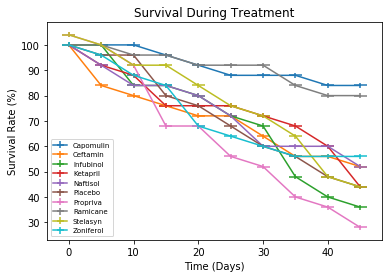

In [58]:
# Generate the Plot (with Error Bars)
x_values=table3.index.values
drugs=table3.columns.values

for drug in drugs:
    plt.errorbar(x_values,table3[drug]/25*100,label=drug,xerr=1, yerr=1)
    
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best",prop={'size': 7})
# Save the Figure
plt.savefig('Images/survival.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [84]:
# Calculate the percent changes for each drug
percent_change=(table1.iloc[-1,:]-table1.iloc[0,:])/table1.iloc[0,:]*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

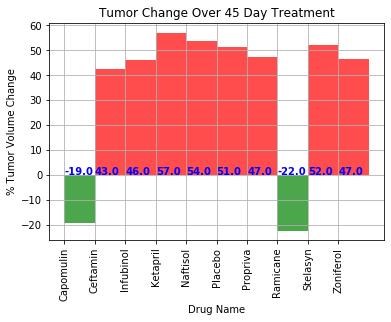

In [179]:
# Store all Relevant Percent Changes into a Tuple
x_values=percent_change.index.values
y_values=tuple(percent_change)

my_color=[]
for k in y_values:
    if k>0:
        my_color.append('r')
    else:
        my_color.append('g')

x_axis=np.arange(len(y_values))

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
plt.bar(x_axis, y_values, color=my_color, alpha=.7, align="edge",width=1)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_values, rotation="vertical")
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug Name")
plt.ylabel("% Tumor Volume Change")
plt.grid()

for i, v in enumerate(tick_locations):
    plt.text(v, 0, round(y_values[i],0), color='blue', fontweight='bold')

# Save the Figure
plt.savefig('Images/change.png')

# Show the Figure
plt.show()
